## Tensor
- rank: 축의 개수
- shape: 형상(각 축에 따른 차원 개수)
- type: data type

In [5]:
import numpy as np
import tensorflow as tf


### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 tensor
- 축과 형상이 없음

In [4]:
t0 = tf.constant(1)
print(t0)
print(tf.rank(t0))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


### 1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 tensor
- 하나의 축이 존재

In [5]:
t1 = tf.constant([1, 2, 3])
print(t1)
print(tf.rank(t1))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


### 2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 samples와 features를 가진 구조로 사용

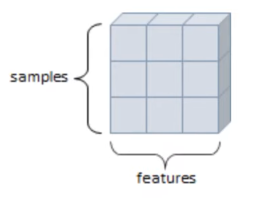

In [6]:
t2 = tf.constant([[1, 2, 3],
                  [4, 5, 6], 
                  [7, 8, 9]])
print(t2)
print(tf.rank(t2))
 

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### 3D Tensor
- cube와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 samples, timesteps, features 를 가진 구조로 사용

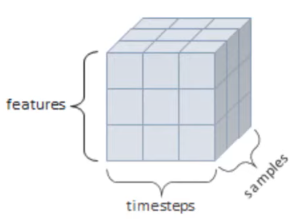

In [7]:
t3 = tf.constant([[[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],  
                  [[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],  
                  [[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]]])
print(t3)
print(tf.rank(t3))

tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]], shape=(3, 3, 3), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 samples, height, width, 컬러 channel을 가진 구조로 사용
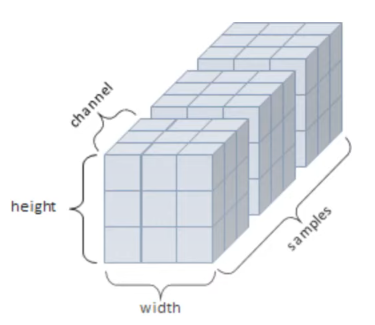

### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표 사례
- 주로 samples, frames, height, width, 컬러 channel을 가진 구조로 사용

### Tensor Data Type
- tensor의 기본 dtype
    - 정수형 텐서: int32
    - 실수형 텐서: float32
    - 문자열 텐서: string
- int32, float32, string 타입 외에도 float16, int8 타입등이 존재
- 연산시 텐서의 타입 일치 필요
- 타입변환에는 tf.cast() 사용

In [8]:
i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [10]:
f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [11]:
s = tf.constant('Suan')
print(s)

tf.Tensor(b'Suan', shape=(), dtype=string)


In [12]:
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [14]:
i8 = tf.constant(2, dtype=tf.int8)
print(i8)

tf.Tensor(2, shape=(), dtype=int8)


In [15]:
f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


In [16]:
i32 = tf.cast(i8, tf.int32)
print(i32)

tf.Tensor(2, shape=(), dtype=int32)


## Tensor 연산

In [22]:
print(tf.constant(2) + tf.constant(2))
print(tf.constant(2) - tf.constant(2))
print(tf.add(tf.constant(2), tf.constant(2)))
print(tf.subtract(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [23]:
print(tf.constant(2) * tf.constant(2))
print(tf.constant(2) / tf.constant(2))
print(tf.multiply(tf.constant(2), tf.constant(2)))
print(tf.divide(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)


In [ ]:
# print(tf.constant(2) + tf.constant(2.2) # 에러남 타입이 달라서

In [27]:
print(tf.cast(tf.constant(2), tf.float32) + tf.constant(2.2))

tf.Tensor(4.2, shape=(), dtype=float32)


## 딥러닝 구조와 학습
- 모델(네트워크)를 구성하는 layer
- 입력 데이터와 그에 대한 목적(결과)
- 학습시에 사용할 피드백을 정의하는 손실 함수(loss function)
- 학습 진행 방식을 결정하는 옵티마이저(optimizer)

### Layer
- 신경망의 핵심 데이터 구조
- 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 상태가 없는 레이어도 있지만 대부분 가중치(weight)라는 레이어 상태를 가짐
- 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

- keras에서 사용되는 주요 레이어
    - Dense
    - Activation
    - Flatten
    - Input

In [3]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Input

### Dense Layer
- 완전 연결 계층 (Fully-Connected Layer)
- 노드수(유닛수), 활성화 함수(activation) 등을 지정
- name을 통한 레이어간 구분가능
- 가중치 초기화(kernel_initializer)
    - 신경망의 성능에 큰 영향을 주는 요소
    - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용
    - 특정 구조의 신경망을 동일한 학습 데이터로 학습시키더라도, 가중치의 초기값에 따라 학습된 신경망의 성능 차이가 날 수 있음
    - 오차 역전파 알고리즘은 기본적으로 경사하강법을 사용하기 때문에 최적해가 아닌 지역해에 빠질 가능성이 있음
    - Keras에서는 기본적으로 Glorot uniform 가중치(Xavier 분포 초기화), zeros bias로 초기화
    - kernel_initalizer 인자를 통해 다른 가중치 초기화 지정 가능
    - [Keras에서 제공하는 가중치 초기화 종류](https://keras.io/api/layers/initializers/)

In [3]:
Dense(10, activation='softmax')

In [4]:
Dense(10, activation='relu', name='Dense Layer')

In [5]:
Dense(10, kernel_initializer='he_normal', name='Dense Layer')

### Activation Layer
- Dense layer에서 미리 활성화 함수를 지정할 수도 있지만 필요에 따라 별도의 레이어를 만들어줄 수 있음
- [Keras에서 제공하는 활성화 함수(activation function) 종류](https://keras.io/ko/activations/)

In [6]:
dense = Dense(10, activation='relu', name='Dense Layer')
Activation(dense)

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- 예시)
```
(128, 3, 2, 2) -> (128, 12)
```

In [7]:
Flatten(input_shape=(128, 3, 2, 2))

### Input
- 모델의 입력을 정의
- shape, dtype을 포함
- 하나의 모델은 여러 개의 입력을 가질 수 있음

In [10]:
Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [11]:
Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_2')>

## Model
- 딥러닝 모델은 레이어로 만들어진 비순환 유향 그래프

### 모델 구성
- Sequential()
- Subclassing
- 함수형 API

### Sequential()
- 모델이 순차적인 구조로 진행할 때 사용
- 간단한 방법
    - Sequential 객체 생성 후, add()를 이용한 방법
    - Sequential 인자에 한번에 추가 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

In [6]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [5]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 300)           8700      
                                                                 
 dense_1 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_2 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


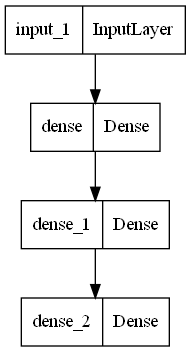

In [7]:
plot_model(model)

In [8]:
model = Sequential([Input(shape=(28, 28), name='Input'),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


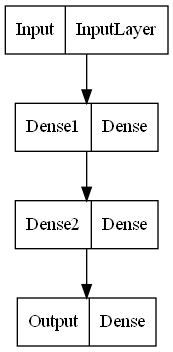

In [9]:
plot_model(model) 

### 함수형 API
- 가장 권장되는 방법
- 모델을 복잡하고 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [10]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


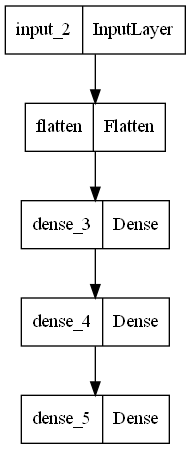

In [11]:
plot_model(model)

In [14]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28, 28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 28, 100)      2900        ['input_1[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 28, 30)       3030        ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_1[0][0]',                
                                                                  'dense_10[0][0]']         

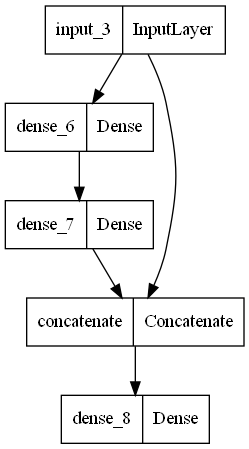

In [13]:
plot_model(model)

In [15]:
input1 = Input(shape=(10, 10), name='Input1')
input2 = Input(shape=(10, 28), name='Input2')

hidden1 = Dense(100, activation='relu')(input2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input1, hidden2])
output = Dense(1, activation='sigmoid', name='ouput')(concat)

model = Model(inputs=[input1, input2], outputs=[output])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input2 (InputLayer)            [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10, 100)      2900        ['Input2[0][0]']                 
                                                                                                  
 Input1 (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 10, 10)       1010        ['dense_12[0][0]']               
                                                                                            

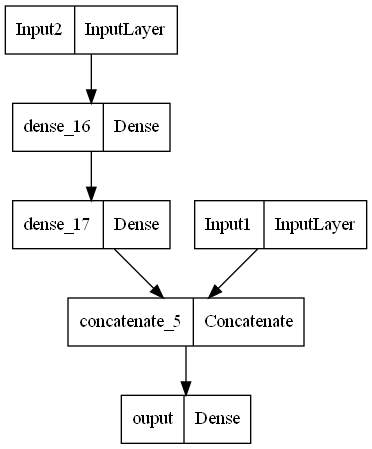

In [13]:
plot_model(model)

In [9]:
input_ = Input(shape=(10, 10), name='input_')
hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_4 (Dense)                (None, 10, 10)       1010        ['dense_3[0][0]']                
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_4[0][0]']                
                                                                                            

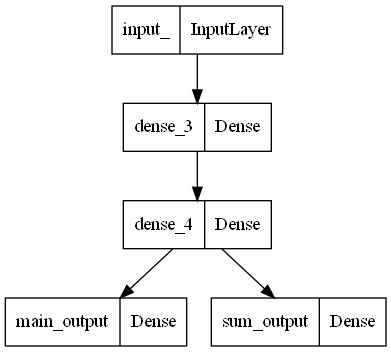

In [10]:
plot_model(model)

In [17]:
input1 = Input(shape=(10, 10), name='input1')
input2 = Input(shape=(10, 28), name='input2')
hidden1 = Dense(100, activation='relu')(input2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input1, input2])
output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input1, input2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input2 (InputLayer)            [(None, 10, 28)]     0           []                               
                                                                                                  
 input1 (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10, 100)      2900        ['input2[0][0]']                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 10, 38)       0           ['input1[0][0]',                 
                                                                  'input2[0][0]']           

### 서브 클래싱
- 커스터마이징에 최적화된 방법
- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음
    - fit(), evaluate(), predict()
    - save(), load()
- 주로 call() 메소드 안에서 원하는 계산 가능
    - for, if, 저수준 연산등
- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때 해석할 수 있어야함

In [ ]:
class MyModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense_layer1 = Dense(300, activation=activation)
        self.dense_layer2 = Dense(100, activation=activation)
        self.dense_layer3 = Dense(units, activation=activation)
        self.ouput_layer = Dense(10, activation='softmax')
        
    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.ouput_layer(x)
        return x

### 모델 가중치 확인

In [18]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [21]:
hidden2 = model.layers[2]
hidden2.name

'dense_18'